<a href="https://colab.research.google.com/github/Shoreef/Monitoring-Physical-Acitvity-for-social-prescribing-/blob/main/data_annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount the Google Drive **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Install The Package**

In [ ]:
!pip install ultralytics>=8.0.81

In [ ]:
!pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=9a1d72eb77c1cc8ee2114797849ff629a39c170fc9cd360c9433b3b1a62e8ee6
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


**Testing the YOLOv8 Pose model**

In [ ]:
import numpy as np
from ultralytics import YOLO
import cv2
import cvzone
import math
import time


# Load YOLOv8 model (pose estimation)
model = YOLO('yolov8n-pose.pt')  # Ensure you have the correct model file

# Load the image
image_path = '/content/drive/MyDrive/test_dataset/walking/walking(1).jpg'
image = cv2.imread(image_path)

# Run YOLOv8 pose estimation
results = model(image)

# Extract the pose information
for result in results:
  boxes = result.boxes
  print(boxes)


0: 384x640 2 persons, 257.3ms
Speed: 4.0ms preprocess, 257.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.])
conf: tensor([0.9332, 0.9311])
data: tensor([[488.0000,  24.0000, 850.0000, 686.0000,   0.9332,   0.0000],
        [154.0000, 141.0000, 436.0000, 716.0000,   0.9311,   0.0000]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[669.0000, 355.0000, 362.0000, 662.0000],
        [295.0000, 428.5000, 282.0000, 575.0000]])
xywhn: tensor([[0.5227, 0.4931, 0.2828, 0.9194],
        [0.2305, 0.5951, 0.2203, 0.7986]])
xyxy: tensor([[488.,  24., 850., 686.],
        [154., 141., 436., 716.]])
xyxyn: tensor([[0.3812, 0.0333, 0.6641, 0.9528],
        [0.1203, 0.1958, 0.3406, 0.9944]])


In [ ]:
for result in results:
  boxes = result.boxes
  for box in boxes:
    print(box)
    break
  break

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9332])
data: tensor([[488.0000,  24.0000, 850.0000, 686.0000,   0.9332,   0.0000]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[669., 355., 362., 662.]])
xywhn: tensor([[0.5227, 0.4931, 0.2828, 0.9194]])
xyxy: tensor([[488.,  24., 850., 686.]])
xyxyn: tensor([[0.3812, 0.0333, 0.6641, 0.9528]])


**Visualization Detection**


0: 384x640 4 persons, 391.7ms
Speed: 6.3ms preprocess, 391.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


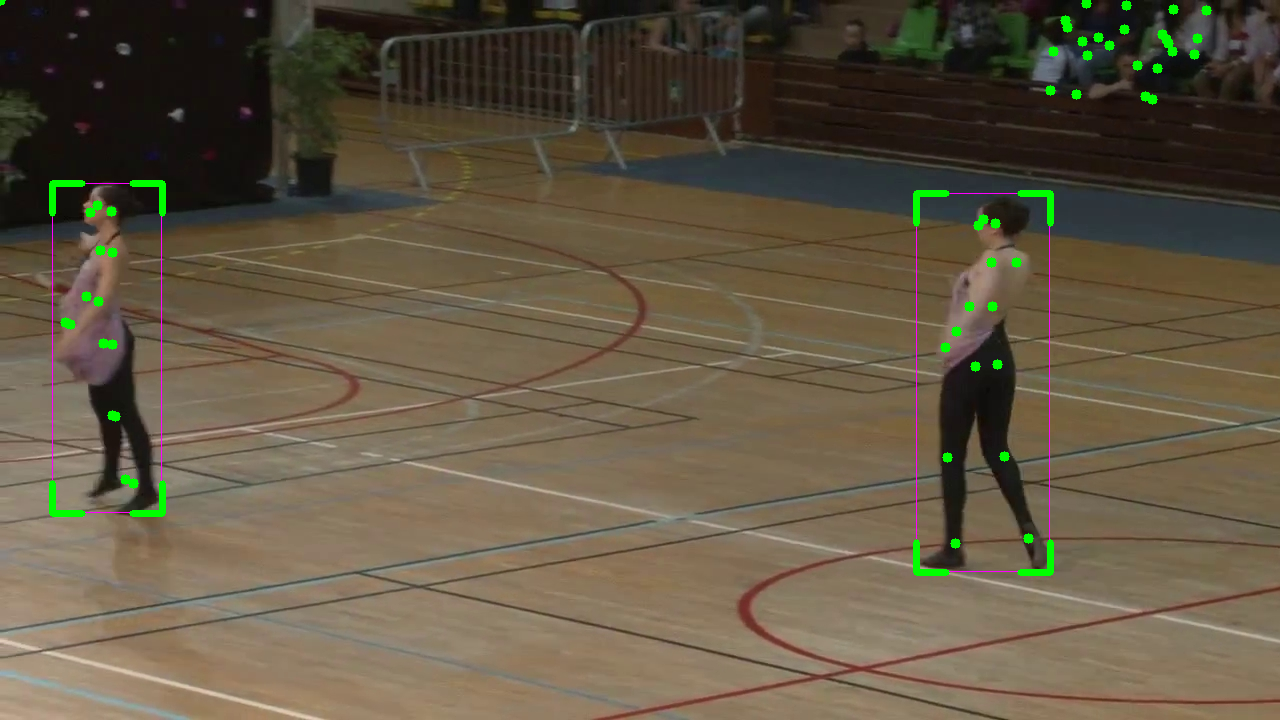

In [ ]:
import numpy as np
from ultralytics import YOLO
import cv2
import cvzone
import math
import time


# Load YOLOv8 model (pose estimation)
model = YOLO('yolov8n-pose.pt')  # Ensure you have the correct model file

# Load the image
image_path = '/content/drive/MyDrive/test_dataset/standing/stand(1).jpg'
image = cv2.imread(image_path)

# Run YOLOv8 pose estimation
results = model(image)

# Extract the pose information
for result in results:
  boxes = result.boxes
  keypoints=result.keypoints
  for box in boxes:
    conf=box.conf
    if conf>=0.5:
      for keypoint in keypoints:
        for pt in keypoint.xy[0]:
          x,y=pt
          cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)

      x1,y1,x2,y2 = box.xyxy[0]
      x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
      w,h = x2-x1,y2-y1
      cvzone.cornerRect(image,(x1,y1,w,h))

cv2_imshow(image)



0: 384x640 6 persons, 159.9ms
Speed: 4.0ms preprocess, 159.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
85
170


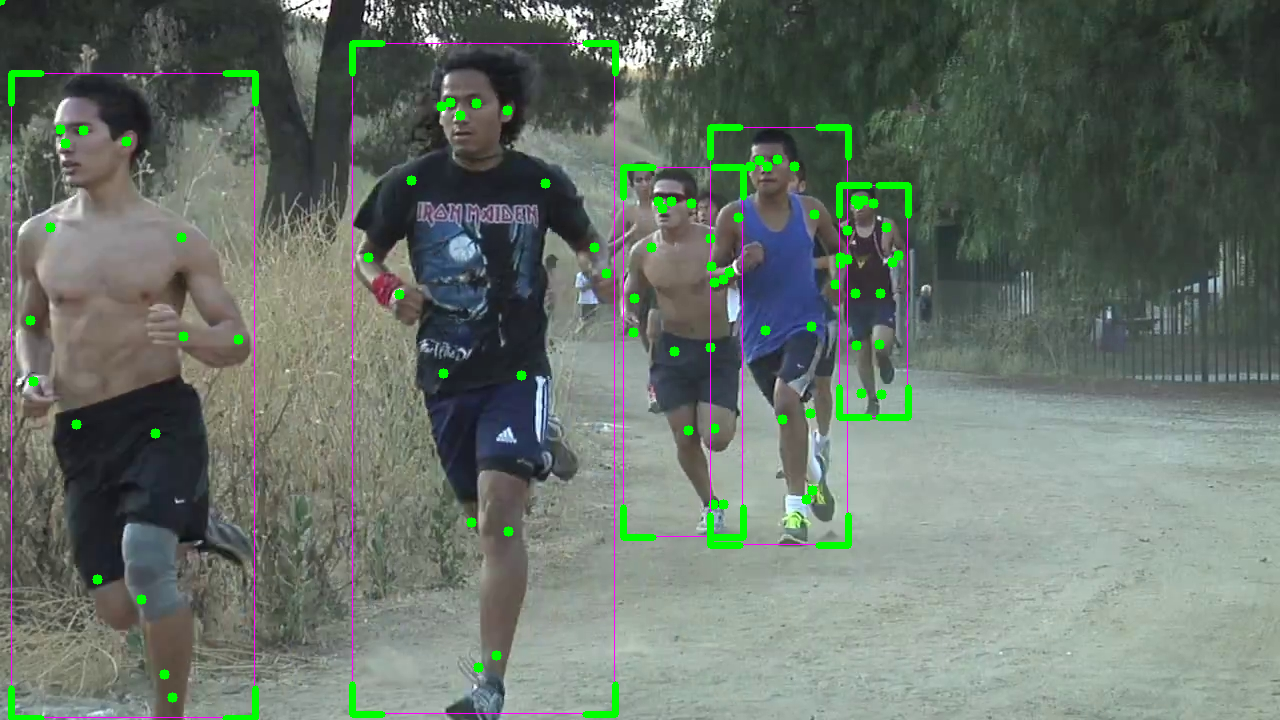

In [ ]:
image_path = '/content/drive/MyDrive/test_dataset/walking/walking(4).jpg'
image = cv2.imread(image_path)
lm_list=[]
# Run YOLOv8 pose estimation
model = YOLO('yolov8n-pose.pt')
results = model(image)
for result in results:
  keypoints=result.keypoints
  boxes=result.boxes
  for j in range (len(boxes)):
    conf=boxes[j].conf
    if conf>=0.5:
      box=boxes[j]
      x1,y1,x2,y2 = box.xyxy[0]
      x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
      w,h = x2-x1,y2-y1
      cvzone.cornerRect(image,(x1,y1,w,h))
      keypoint=keypoints[j]
      for pt in keypoint.xy[0]:
        x,y=pt
        lm_list.append([int(x), int(y)])

        #
        cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)


pre_lm = norm_kpts(lm_list)
print(len(lm_list))
print(len(pre_lm))
cv2_imshow(image)

**KeyPointNormalization**

In [ ]:
def norm_kpts(lm_list, torso_size_multiplier=2.5):
    max_distance = 0
    center_x = (lm_list[12][0] +       # right_hip
                lm_list[11][0])*0.5    # left_hip
    center_y = (lm_list[12][1] +       # right_hip
                lm_list[11][1])*0.5    # left_hip

    shoulders_x = (lm_list[6][0] +       # right_shoulder
                    lm_list[5][0])*0.5   # left_shoulder
    shoulders_y = (lm_list[6][1] +       # right_shoulder
                    lm_list[5][1])*0.5   # left_shoulder

    for lm in lm_list:
        distance = math.sqrt(
            (lm[0] - center_x)**2 + (lm[1] - center_y)**2)
        if(distance > max_distance):
            max_distance = distance
    torso_size = math.sqrt(
        (shoulders_x - center_x)**2 + (shoulders_y - center_y)**2)
    max_distance = max(
        torso_size*torso_size_multiplier, max_distance)

    pre_lm = list(np.array(
        [[(landmark[0]-center_x)/max_distance, (landmark[1]-center_y)/max_distance] for landmark in lm_list]
    ).flatten())

    return pre_lm

**Save the keypoints in a CSV file**

In [ ]:
from ultralytics import YOLO
from utils import norm_kpts
import pandas as pd
import cv2
import os
import glob
import argparse



col_names = [
    '0_X', '0_Y', '1_X', '1_Y', '2_X', '2_Y', '3_X', '3_Y', '4_X', '4_Y', '5_X', '5_Y',
    '6_X', '6_Y', '7_X', '7_Y', '8_X', '8_Y', '9_X', '9_Y', '10_X', '10_Y', '11_X', '11_Y',
    '12_X', '12_Y', '13_X', '13_Y', '14_X', '14_Y', '15_X', '15_Y', '16_X', '16_Y'
]

model = YOLO('yolov8n-pose.pt')
dataset_path='/content/drive/MyDrive/test_dataset'
full_lm_list = []
target_list = []
class_names = sorted(os.listdir(dataset_path)) ######dataset
for class_name in class_names:
    path_to_class = os.path.join(dataset_path, class_name)
    img_list = glob.glob(path_to_class + '/*.jpg') + \
        glob.glob(path_to_class + '/*.jpeg') + \
        glob.glob(path_to_class + '/*.png')
    img_list = sorted(img_list)

    for img_path in img_list:
        img = cv2.imread(img_path)

        if img is None:
            print(
                f'[ERROR] Error in reading {img_path} -- Skipping.....\n[INFO] Taking next Image')
            continue
        else:
            results = model.predict(img)
            for result in results:

                keypoints=result.keypoints
                boxes=result.boxes
                for j in range (len(boxes)):
                  conf=boxes[j].conf
                  if conf>=0.5:
                    lm_list = []
                    box=boxes[j]
                    keypoint=keypoints[j]
                    for pt in keypoint.xy[0]:
                      x,y=pt
                      lm_list.append([int(x), int(y)])

                    if len(lm_list) == 17:
                        pre_lm = norm_kpts(lm_list)
                        full_lm_list.append(pre_lm)
                        target_list.append(class_name)

                        print(f'{os.path.split(img_path)[1]} Landmarks added Successfully')
    print(f'[INFO] {class_name} Successfully Completed')
print('[INFO] Landmarks from Dataset Successfully Completed')

# to csv
data_x = pd.DataFrame(full_lm_list, columns=col_names)
data = data_x.assign(Pose_Class=target_list)
data.to_csv('data.csv', encoding='utf-8', index=False)
print(f"[INFO] Successfully Saved Landmarks data into ")



0: 384x640 4 persons, 157.1ms
Speed: 4.3ms preprocess, 157.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
stand(1).jpg Landmarks added Successfully
stand(1).jpg Landmarks added Successfully

0: 384x640 1 person, 264.4ms
Speed: 3.1ms preprocess, 264.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
stand(2).jpg Landmarks added Successfully

0: 480x640 1 person, 319.9ms
Speed: 3.4ms preprocess, 319.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
stand(3).jpg Landmarks added Successfully

0: 480x640 3 persons, 339.2ms
Speed: 3.3ms preprocess, 339.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
stand(4).jpg Landmarks added Successfully
stand(4).jpg Landmarks added Successfully

0: 448x640 9 persons, 326.2ms
Speed: 5.0ms preprocess, 326.2ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
stand(5).jpg Landmarks added Successfully
stand(5).jpg Landmarks added Successfully
stand(5).jpg Landmark